<a href="https://colab.research.google.com/github/Kanchanasud/bsc_dpdm22/blob/main/_copy_of_classification_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

8


<Figure size 432x288 with 0 Axes>

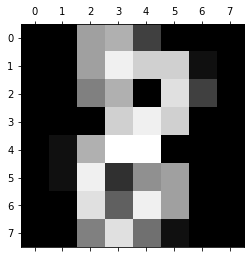

In [5]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

# Quiz 3 march

- แบ่ง data ออกเป็น 80%(train) 20%(test) โดยใช้ random_state = เลขกลุ่ม shuffle=True (กลุ่ม 6)
- หา parameters ที่ดีที่สุด (K (1,3,5), Distance_weighted(yes/no)) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุด กับ test data


 - แบ่ง data ออกเป็น 80%(train) 20%(test) โดยใช้ random_state = เลขกลุ่ม shuffle=True (กลุ่ม 6)


In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# load digits dataset
digits = load_digits()

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=6) #แบ่งข้อมูลออกออกเป็น 80%(train) 20%(test) โดยใช้ random_state =6


In [7]:

import numpy as np #คำสั่งดังนี้เพื่อตรวจสอบจำนวนข้อมูลในแต่ละคลาส 

unique, counts = np.unique(y_train, return_counts=True)
print("Training set class distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Test set class distribution:", dict(zip(unique, counts)))


Training set class distribution: {0: 138, 1: 145, 2: 135, 3: 151, 4: 138, 5: 145, 6: 144, 7: 145, 8: 145, 9: 151}
Test set class distribution: {0: 40, 1: 37, 2: 42, 3: 32, 4: 43, 5: 37, 6: 37, 7: 34, 8: 29, 9: 29}


In [8]:
#ตรวจสอบว่าการแบ่งข้อมูลถูกต้องหรือไม่
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 1437
Test set size: 360


- หา parameters ที่ดีที่สุด (K (1,3,5), Distance_weighted(yes/no)) ด้วย 10-fold-cross-validation

In [9]:
#หาพารามิเตอร์ที่เหมาะสม โดย K ที่เราจะใช้คือ 1, 3, 5 และ Distance_weighted คือ yes หรือ no ซึ่งหมายความว่าเราจะใช้เพียงระยะทางเป็นตัวชี้วัดหรือไม่ก็ขึ้นอยู่กับการใช้ weight ในการคำนวณระยะทาง โดยใช้ GridSearchCV ของ scikit-learn เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

# load the digits dataset
digits = load_digits()

# define the k-NN classifier
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5], 'weights': ['uniform', 'distance']}

# perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=10)
grid_search.fit(digits.data, digits.target)

# print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9771849782743638


- test parameters ที่ดีที่สุด กับ test data

In [10]:
#สร้างโมเดล k-NN ด้วย parameters ดังกล่าวและนำมาทดสอบกับข้อมูลที่เหลือที่ไม่ได้ใช้ในการเทรนโมเดล (test data)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# load the digits dataset
digits = load_digits()

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=6)

# define the k-NN classifier with the best parameters found from cross-validation
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# train the classifier on the training data
knn.fit(X_train, y_train)

# test the classifier on the test data
accuracy = knn.score(X_test, y_test)

# print the test accuracy
print("Test accuracy:", accuracy)


Test accuracy: 0.9861111111111112


In [11]:
################################อีกวิธี###########################################

In [12]:
from sklearn.model_selection import train_test_split

X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, shuffle=True)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_range = [1, 3, 5]
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'weights': weight_options}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                 weights=grid_search.best_params_['weights'])

best_knn.fit(X_train, y_train)

accuracy = best_knn.score(X_test, y_test)

print("Accuracy on test data: {:.2f}%".format(accuracy * 100))

Best Parameters:  {'n_neighbors': 3, 'weights': 'distance'}
Accuracy on test data: 98.61%


#เฉลย

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

In [14]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=50)

In [15]:

from sklearn.neighbors import KNeighborsClassifier

- model selection

In [16]:
# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9853875291375293
Mean Cross-Validation Score: K3weighted 0.9853875291375293
Mean Cross-Validation Score: K5weighted 0.9853923853923854
Mean Cross-Validation Score: K1NOweighted 0.9853875291375293
Mean Cross-Validation Score: K3NOweighted 0.9853826728826729
Mean Cross-Validation Score: KNOweighted 0.9846930846930848


- Evaluate with test set

In [17]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)

Accuracy score:  0.975


#การบ้าน หาโมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets

In [19]:
from sklearn.model_selection import train_test_split  #การแบ่งข้อมูลเป็น train set 80% และ test set 20% 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # X คือ feature และ y คือ target  

- จะใช้ 10-fold cross-validation เพื่อประเมินประสิทธิภาพของแต่ละโมเดล

#Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier     
from sklearn.model_selection import GridSearchCV   #GridSearchCV คือ การหาค่าที่ดีที่สุดของพารามิเตอร์ วิธีคือการกำหนดค่าของแต่ละพารามิเตอร์ที่เราต้องการจะหา 

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {'max_depth': [3, 5],
              'min_samples_split': [2, 5]}

# Define the model   กำหนดโมเดล
dt = DecisionTreeClassifier(random_state=42)

# Define the grid search  #กำหนดและหา  GridSearchCV 
dt_cv = GridSearchCV(dt, param_grid, cv=10)

# Fit the grid search to the data #ปรับ grid ให้ค้นหาข้อมูล
dt_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", dt_cv.best_params_)
print("Best score: ", dt_cv.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 2}
Best score:  0.645066045066045


#Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {}

# Define the model  กำหนดโมเดล
nb = GaussianNB()

# Define the grid search  กำหนดและหา  GridSearchCV 
nb_cv = GridSearchCV(nb, param_grid, cv=10)

# Fit the grid search to the data  # ปรับการค้นหา GridSearchCV ให้พอดีกับข้อมูล
nb_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score  แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", nb_cv.best_params_)
print("Best score: ", nb_cv.best_score_)

Best parameters:  {}
Best score:  0.8295211732711734


#KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {'n_neighbors': [1, 3],
              'weights': ['uniform', 'distance']}

# Define the model กำหนดโมเดล
knn = KNeighborsClassifier()

# Define the grid search  กำหนดและหา  GridSearchCV 
knn_cv = GridSearchCV(knn, param_grid, cv=10)

# Fit the grid search to the data ปรับการค้นหา GridSearchCV ให้พอดีกับข้อมูล
knn_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score  แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)

Best parameters:  {'n_neighbors': 1, 'weights': 'uniform'}
Best score:  0.9881604506604506


#ANN

In [23]:
from sklearn.naive_bayes import GaussianNB

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {}

# Define the model  กำหนดโมเดล
nb = GaussianNB()

# Define the grid search  กำหนดและหา  GridSearchCV 
nb_cv = GridSearchCV(nb, param_grid, cv=10)

# Fit the grid search to the data  # ปรับการค้นหา GridSearchCV ให้พอดีกับข้อมูล
nb_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score  แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", nb_cv.best_params_)
print("Best score: ", nb_cv.best_score_)

Best parameters:  {}
Best score:  0.8295211732711734


# ตัวโมเดลที่ดีที่สุด คือ KNN มีค่าเท่ากับ 0.9881604506604506

#อีกวิธี


- DecisionTree

In [24]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 6 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

# Define parameter set 1
params1 = {'criterion': 'gini', 'max_depth': 3}

# Define parameter set 2
params2 = {'criterion': 'entropy', 'max_depth': 5}

# Create decision tree with parameter set 1
dt1 = DecisionTreeClassifier(criterion=params1['criterion'], max_depth=params1['max_depth'])

# Create decision tree with parameter set 2
dt2 = DecisionTreeClassifier(criterion=params2['criterion'], max_depth=params2['max_depth'])

# Evaluate the decision tree with parameter set 1
accuracy1 = cross_val_score(dt1, digits.data, digits.target, cv=5).mean()

# Evaluate the decision tree with parameter set 2
accuracy2 = cross_val_score(dt2, digits.data, digits.target, cv=5).mean()

# Compare the accuracies of the two models and choose the one with the highest accuracy
if accuracy1 > accuracy2:
    print("DT1 Parameter set 1 is better with an accuracy of", accuracy1)
else:
    print("DT2 Parameter set 2 is better with an accuracy of", accuracy2)

# ค่า accuracy จะถูกคำนวณด้วย cross_val_score

DT2 Parameter set 2 is better with an accuracy of 0.7329356236459301


- NaiveBayes

In [25]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split

X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 6 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True  สลับลำดับข้อมูลก่อนแบ่งชุดเพื่อลดผลกระทบจากการจัดเรียงข้อมูล

# Parameter Set 1: สร้างโมเดล Multinomial Naive Bayes โดยกำหนด alpha=1.0 เพื่อใช้ Laplace smoothing
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)
# คำนวณค่า accuracy ของโมเดลด้วยชุดข้อมูลทดสอบ (X_test, y_test)
mnb_score = mnb.score(X_test, y_test)

# Parameter Set 2: สร้างโมเดล Gaussian Naive Bayes โดยไม่ใช้ Smoothing
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_score = gnb.score(X_test, y_test)

# Print best model based on test set accuracy
if mnb_score > gnb_score:
    print("Best Model: Multinomial Naive Bayes with Laplace Smoothing")
    print("Test Accuracy: %0.2f" % mnb_score)
else:
    print("Best Model: Gaussian Naive Bayes without Smoothing")
    print("Test Accuracy: %0.2f" % gnb_score)

Best Model: Multinomial Naive Bayes with Laplace Smoothing
Test Accuracy: 0.90


- หลังจากที่ได้คำนวณค่าความแม่นยำของ Multinomial Naive Bayes และ Gaussian Naive Bayes จากข้อมูล test set แล้ว
- เงื่อนไขที่กำหนดใน if คือ mnb_score > gnb_score ซึ่งหมายความว่าถ้าโมเดล Multinomial Naive Bayes มีค่าความแม่นยำสูงกว่าโมเดล Gaussian Naive Bayes จะเข้าเงื่อนไข if
- และทำงานในส่วนของคำสั่งที่อยู่ภายใน if โดยพิมพ์ข้อความ "Best Model: Multinomial Naive Bayes with Laplace Smoothing" และค่าความแม่นยำของโมเดล Multinomial Naive Bayes ที่ได้จากการทดสอบ
- แต่ถ้าเงื่อนไขเป็นเท็จจะเข้าเงื่อนไข else และทำงานในส่วนของคำสั่งที่อยู่ภายใน else โดยพิมพ์ข้อความ "Best Model: Gaussian Naive Bayes without Smoothing"

# KNN

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 6 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

# Define parameter sets
params_set_1 = {'n_neighbors': 3, 'weights': 'uniform'}
params_set_2 = {'n_neighbors': 5, 'weights': 'distance'}

# Train and test KNN models with parameter sets
knn_1 = KNeighborsClassifier(**params_set_1)
knn_1.fit(X_train, y_train)
print('KNN 1 accuracy:', knn_1.score(X_test, y_test))

knn_2 = KNeighborsClassifier(**params_set_2)
knn_2.fit(X_train, y_train)
print('KNN 2 accuracy:', knn_2.score(X_test, y_test))

KNN 1 accuracy: 0.9861111111111112
KNN 2 accuracy: 0.9888888888888889


#ANN

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 6 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

# กำหนด parameter sets ที่ต้องการทดสอบ
#กำหนด parameter sets ที่ต้องการทดสอบโดยกำหนด hidden_layer_sizes เป็นจำนวนโหนดใน Hidden layer และกำหนด activation เป็นฟังก์ชัน Activation function 
#และกำหนด solver เป็น Algorithm สำหรับ optimization
param_set_1 = {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'lbfgs'} 
param_set_2 = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam'}

# สร้างและ train โมเดล ANN สำหรับ parameter sets ที่กำหนด โดยใช้ MLPClassifier และ fit โมเดลด้วยข้อมูล X_train และ y_train

model_1 = MLPClassifier(**param_set_1, random_state=42)
model_1.fit(X_train, y_train)

model_2 = MLPClassifier(**param_set_2, random_state=42)
model_2.fit(X_train, y_train)

# ประเมินประสิทธิภาพของโมเดล ANN กับ test set โดยใช้ predict เพื่อทำนายผลลัพธ์จากโมเดลและใช้ accuracy_score เพื่อคำนวณค่าความแม่นยำของโมเดล
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)


#แสดงผลลัพธ์ค่าความแม่นยำของโมเดล ANN ของ parameter sets 1 และ 2
print(f"Accuracy for model 1 ANN1: {accuracy_1}")
print(f"Accuracy for model 2 ANN2: {accuracy_2}")

Accuracy for model 1 ANN1: 0.9638888888888889
Accuracy for model 2 ANN2: 0.9694444444444444


#รวม

In [30]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X = digits['data']
y = digits['target']
# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, shuffle=True) #test_size=0.2 คือ 20% 
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 6 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

#DT
# Define parameter set 1
params1 = {'criterion': 'gini', 'max_depth': 3}
# Define parameter set 2
params2 = {'criterion': 'entropy', 'max_depth': 5}
# Create decision tree with parameter set 1
dt1 = DecisionTreeClassifier(criterion=params1['criterion'], max_depth=params1['max_depth'])
# Create decision tree with parameter set 2
dt2 = DecisionTreeClassifier(criterion=params2['criterion'], max_depth=params2['max_depth'])
# Evaluate the decision tree with parameter set 1
accuracy1 = cross_val_score(dt1, digits.data, digits.target, cv=5).mean()
# Evaluate the decision tree with parameter set 2
accuracy2 = cross_val_score(dt2, digits.data, digits.target, cv=5).mean()
# Compare the accuracies of the two models and choose the one with the highest accuracy
if accuracy1 > accuracy2:
    print("DT1 Parameter set 1 is better with an accuracy of", accuracy1)
else:
    print("DT2 Parameter set 2 is better with an accuracy of", accuracy2)

#NaiveBayes
# Parameter Set 1: Multinomial Naive Bayes with Laplace Smoothing
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)
mnb_score = mnb.score(X_test, y_test)

# Parameter Set 2: Gaussian Naive Bayes without Smoothing
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_score = gnb.score(X_test, y_test)

# Print best model based on test set accuracy
if mnb_score > gnb_score:
    print("Best Model: Multinomial Naive Bayes with Laplace Smoothing")
    print("Test Accuracy: %0.2f" % mnb_score)
else:
    print("Best Model: Gaussian Naive Bayes without Smoothing")
    print("Test Accuracy: %0.2f" % gnb_score)

#KNN
# Define parameter sets
params_set_1 = {'n_neighbors': 3, 'weights': 'uniform'}
params_set_2 = {'n_neighbors': 5, 'weights': 'distance'}

# Train and test KNN models with parameter sets
knn_1 = KNeighborsClassifier(**params_set_1)
knn_1.fit(X_train, y_train)
print('KNN 1 accuracy:', knn_1.score(X_test, y_test))

knn_2 = KNeighborsClassifier(**params_set_2)
knn_2.fit(X_train, y_train)
print('KNN 2 accuracy:', knn_2.score(X_test, y_test))

#ANN
# กำหนด parameter sets ที่ต้องการทดสอบ
#กำหนด parameter sets ที่ต้องการทดสอบโดยกำหนด hidden_layer_sizes เป็นจำนวนโหนดใน Hidden layer และกำหนด activation เป็นฟังก์ชัน Activation function 
#และกำหนด solver เป็น Algorithm สำหรับ optimization
param_set_1 = {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'lbfgs'} 
param_set_2 = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam'}

# สร้างและ train โมเดล ANN สำหรับ parameter sets ที่กำหนด โดยใช้ MLPClassifier และ fit โมเดลด้วยข้อมูล X_train และ y_train

model_1 = MLPClassifier(**param_set_1, random_state=42)
model_1.fit(X_train, y_train)

model_2 = MLPClassifier(**param_set_2, random_state=42)
model_2.fit(X_train, y_train)

# ประเมินประสิทธิภาพของโมเดล ANN กับ test set โดยใช้ predict เพื่อทำนายผลลัพธ์จากโมเดลและใช้ accuracy_score เพื่อคำนวณค่าความแม่นยำของโมเดล
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

#แสดงผลลัพธ์ค่าความแม่นยำของโมเดล ANN ของ parameter sets 1 และ 2
print(f"Accuracy for model 1 ANN1: {accuracy_1}")
print(f"Accuracy for model 2 ANN2: {accuracy_2}")



print('โมเดลที่ดีที่สุดคือ KNN 2 accuracy:', knn_2.score(X_test, y_test))

DT2 Parameter set 2 is better with an accuracy of 0.7334911792014858
Best Model: Multinomial Naive Bayes with Laplace Smoothing
Test Accuracy: 0.90
KNN 1 accuracy: 0.9861111111111112
KNN 2 accuracy: 0.9888888888888889
Accuracy for model 1 ANN1: 0.9638888888888889
Accuracy for model 2 ANN2: 0.9694444444444444
โมเดลที่ดีที่สุดคือ KNN 2 accuracy: 0.9888888888888889
